In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt


In [70]:
poses = np.load("poses1624430610.npy")
vectors = np.empty((len(poses),3))
directs = vectors.copy()
for i,p in enumerate(poses):
    vectors[i] = np.dot(np.linalg.inv(poses[i]),np.array([0,0,0,1]))[:3]
    directs[i] = np.dot(np.linalg.inv(poses[i]),np.array([0,1,0,1]))[:3]
    directs[i] = directs[i]*0.1

In [71]:
vectors.shape,directs.shape

((220, 3), (220, 3))

<IPython.core.display.Javascript object>


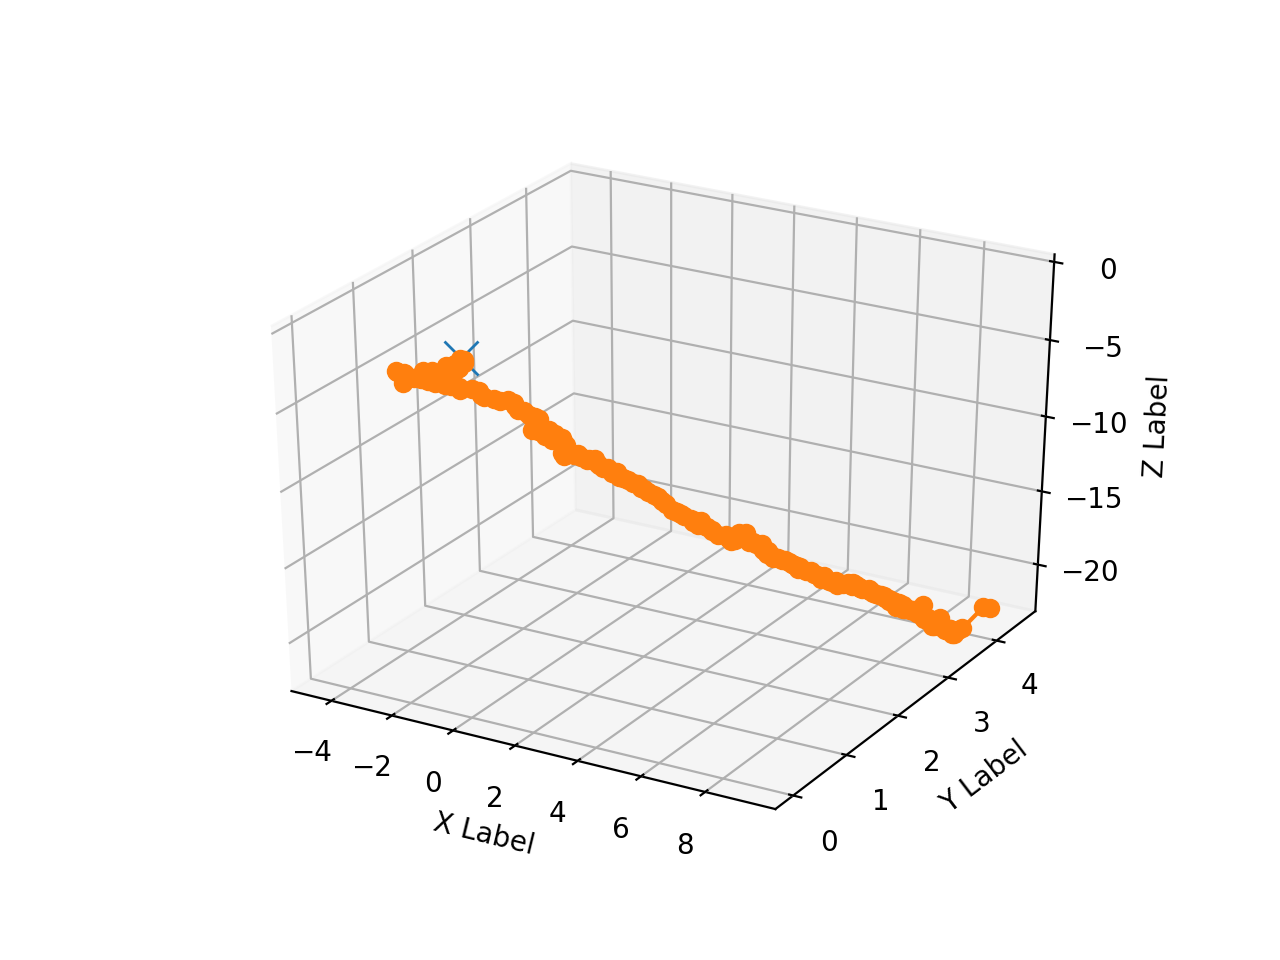

In [66]:
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot(vectors[0:1,0],vectors[0:1,1],vectors[0:1,2], marker='x',markersize=12)
vectors = vectors[1:]
ax.plot(vectors[:,0],vectors[:,1],vectors[:,2], marker='o')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

<IPython.core.display.Javascript object>


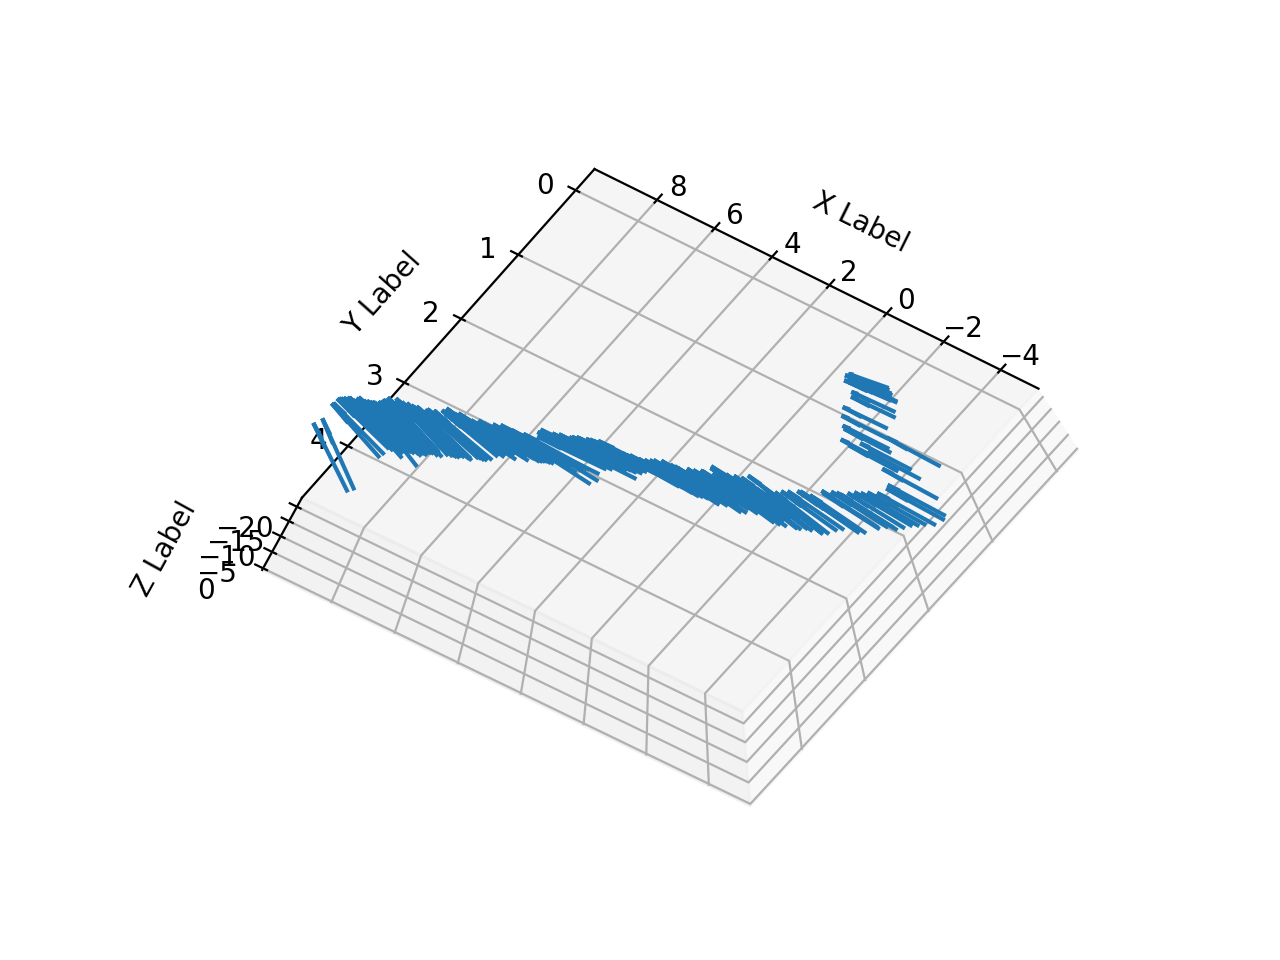

In [132]:
poses = np.load("poses1624430610.npy")
vectors = np.empty((len(poses),3))
directs = vectors.copy()
for i,p in enumerate(poses):
    vectors[i] = np.dot(np.linalg.inv(poses[i]),np.array([0,0,0,1]))[:3]
    directs[i] = np.dot(np.linalg.inv(poses[i]),np.array([1,0,2,1]))[:3] - vectors[i]
    directs[i] = directs[i]
    
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
i=0
for v in np.hstack([vectors,directs]):
    new_v = np.stack([v[:3],v[3:]])

#     ax.arrow(new_v[:,0],new_v[:,1],new_v[:,2], marker='^')
    ax.quiver(new_v[0,0],new_v[0,1],new_v[0,2],new_v[1,0],new_v[1,1],new_v[1,2],length=3, normalize=True)
    i+=1


ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [ ]:
stds = []
for a in range(50):
    for b in range(50):
        for c in range(50):
            for i,p in enumerate(poses):
                vectors[i] = np.dot(np.linalg.inv(poses[i]),np.array([0,0,0,1]))[:3]
                directs[i] = np.dot(np.linalg.inv(poses[i]),np.array([a,b,c,1]))[:3] - vectors[i]
                directs[i] = directs[i]
            stds.append(((directs[0] / np.linalg.norm(directs[0] ) / (vectors[1]-vectors[0])).std(),(a,b,c)))

/Users/soshiyuu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


In [ ]:
v = np.array([s[0] for s in stds])
v[1:].argmin()+1

(4.359311596417788, (1, 0, 2))

In [6]:
poses = np.load("/Users/soshiyuu/Development/Github/pyslam/pose_pickles/poses1624430610.npy")
vectors = np.empty((len(poses),3))
for i,p in enumerate(poses):
    vectors[i] = poses[i][:3,3]

<IPython.core.display.Javascript object>


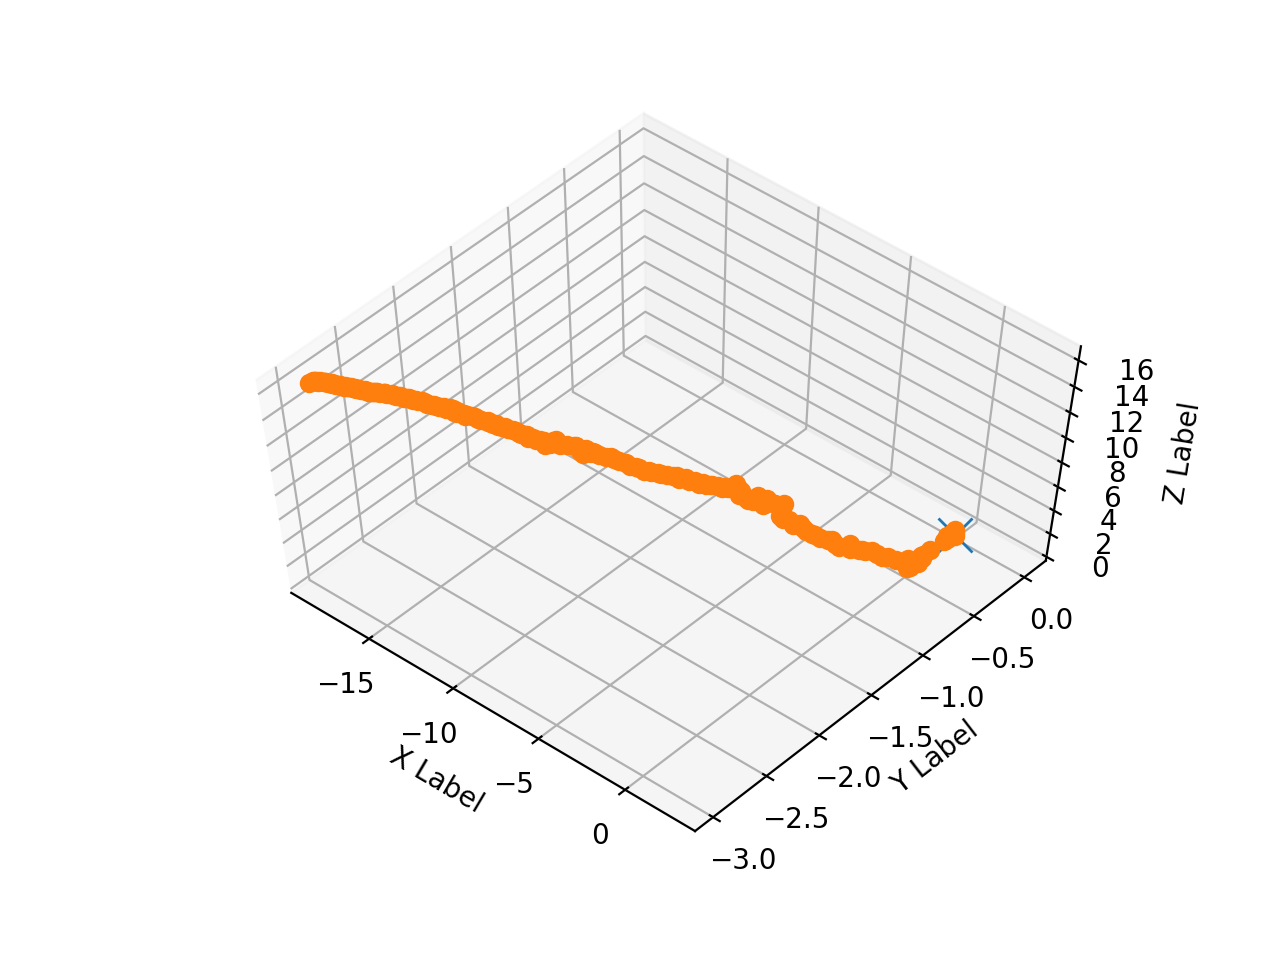

In [7]:
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot(vectors[0:1,0],vectors[0:1,1],vectors[0:1,2], marker='x',markersize=12)
vectors = vectors[1:]
ax.plot(vectors[:,0],vectors[:,1],vectors[:,2], marker='o')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [59]:
poses[2]

array([[ 0.99998604, -0.00107472, -0.00517443, -0.02166362],
       [ 0.00108354,  0.99999796,  0.0017033 , -0.03944085],
       [ 0.00517258, -0.00170888,  0.99998516,  0.18586036],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])